In [57]:
import io
import pickle
from copy import deepcopy
from matplotlib import pyplot as plt
from PIL import Image
import subprocess
from subprocess import Popen, PIPE
import random
import imageio
import numpy as np

In [58]:
from matplotlib.backends.backend_template import FigureCanvas
def plot_to_PIL(fig, dpi=100):
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=dpi)
    buf.seek(0)
    pil_img = deepcopy(Image.open(buf))
    buf.close()
    return pil_img

def interpolate_images(img1, img2, factor):
    # Veic pāreju starp diviem attēliem
    # Factor 0 nozīmē ka pilnībā redzams tikai img1
    # Factor 1 nozīmē ka pilnībā redzams tikai img2
    # Tiek pieņemts ka attēliem ir vienādas dimensijas - ja tā nav - pats esi vainīgs
    # Tiek arī pieņemts ka abu attēlu feature vērtības ir apgabalā [0;+1] (kas ir arī SOM svaru īpašība)
    new_image = [
        [
            [img1[i][j][0]*(1-factor) + img2[i][j][0]*factor,
             img1[i][j][1]*(1-factor) + img2[i][j][1]*factor,
             img1[i][j][2]*(1-factor) + img2[i][j][2]*factor] for j in range(len(img1[0]))
        ] for i in range(len(img1))
    ]

    return new_image

def random_image(dimension):
    new_image = [[[random.random(),random.random(),random.random()] for j in range(dimension)] for i in range(dimension)]

    return new_image

# image ir NxN masīvs, kurā katrs elements ir vektors [x1, x2, x3]
def plot_som(image, meta_this_epoch=None, meta_max_epoch=None):
    fig = plt.Figure(figsize=[len(image)/20, len(image[0])/20])
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

    fig.subplots_adjust(left = 0, right = 1, bottom = 0.1, top = 0.9)
    if meta_this_epoch is not None and meta_max_epoch is not None:
        ax.set_title("Epoha {} no {}".format(meta_this_epoch, meta_max_epoch))

    ax.imshow(image, interpolation='gaussian')
    #ax.axis('tight')
    #ax.axis('off')
    return fig

# image_list ir masīvs, kurš sastāv no iepriekš aprakstītā veida "images"
def som_animation(image_list, frames_per_second=30, seconds_per_epoch=1):
    previous_image = None

    #fps, duration = frames_per_epoch, frames_per_epoch * (len(image_list)-1)
    #p = Popen(['ffmpeg', '-y', '-f', 'image2pipe', '-vcodec', 'png', '-r', str(fps), '-i', '-', '-vcodec', 'mpeg4', '-qscale', '5', '-r', str(fps), 'video.mp4'], stdin=PIPE, stdout=PIPE, shell=True)
    writer = imageio.get_writer('video.mp4', fps=frames_per_second)
    for idx, img in enumerate(image_list):
        print("Rendering {}/{}".format(idx, len(image_list)))
        if previous_image is None:
            # Vajag uzstādīt pirmo attēlu, no kura notiks pāreja
            previous_image = img
            continue

        for i in range(round(frames_per_second * seconds_per_epoch)):
            interp_img = interpolate_images(previous_image, img, i/(frames_per_second * seconds_per_epoch))
            fig = plot_som(interp_img, meta_this_epoch=idx, meta_max_epoch=len(image_list))
            pil_fig = plot_to_PIL(fig)
            #pil_fig.save(p.stdin, 'PNG')
            fig.clf()
            #img = createFrame(i)
            writer.append_data(np.array(pil_fig))
        previous_image = img
    writer.close()
    #p.stdin.close()
    #p.wait()

In [59]:
# Load epochs from SOM training
list_x = pickle.load( open( "all_epochs.pickle", "rb" ) )

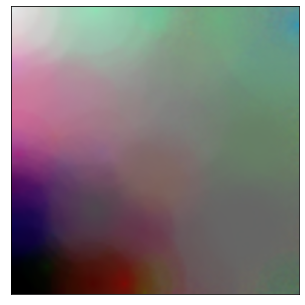

In [60]:
#list_x = [random_image(100) for i in range(2)]
plot_som(list_x[999])

In [61]:
som_animation(list_x, 30, 0.05)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 500) to (512, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Rendering 0/1000
Rendering 1/1000
Rendering 2/1000
Rendering 3/1000
Rendering 4/1000
Rendering 5/1000
Rendering 6/1000
Rendering 7/1000
Rendering 8/1000
Rendering 9/1000
Rendering 10/1000
Rendering 11/1000
Rendering 12/1000
Rendering 13/1000
Rendering 14/1000
Rendering 15/1000
Rendering 16/1000
Rendering 17/1000
Rendering 18/1000
Rendering 19/1000
Rendering 20/1000
Rendering 21/1000
Rendering 22/1000
Rendering 23/1000
Rendering 24/1000
Rendering 25/1000
Rendering 26/1000
Rendering 27/1000
Rendering 28/1000
Rendering 29/1000
Rendering 30/1000
Rendering 31/1000
Rendering 32/1000
Rendering 33/1000
Rendering 34/1000
Rendering 35/1000
Rendering 36/1000
Rendering 37/1000
Rendering 38/1000
Rendering 39/1000
Rendering 40/1000
Rendering 41/1000
Rendering 42/1000
Rendering 43/1000
Rendering 44/1000
Rendering 45/1000
Rendering 46/1000
Rendering 47/1000
Rendering 48/1000
Rendering 49/1000
Rendering 50/1000
Rendering 51/1000
Rendering 52/1000
Rendering 53/1000
Rendering 54/1000
Rendering 55/1000
Re